### K-최근접 이웃 알고리즘 (K-Nearest Neighbor, KNN)
- 임의의 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 더 많은 데이터가 포함되어 있는 범주로 분류하는 방식이다.
- 가장 간단한 머신러닝 알고리즘으로서, 직관적이고 나름 성능도 괜찮다.
- K를 어떻게 정하는지에 따라서 결과값이 바뀔 수 있다. K는 임의의 데이터가 주어졌을 때 가까운 이웃들의 개수이고 기본값은 5이다.
- K는 가장 가까운 5개의 이웃 데이터를 기반으로 분류하며, 일반적으로 홀수를 사용한다. 짝수일 경우 동점이 되어 하나의 결과를 도출할 수 없기 때문이다.

<img src='./images/knn01.png' width='400px'><img src='./images/knn02.png' width='400px'>

- KNN은 fit을 통해 훈련시키면, 학습하지 않고 저장만 해놓는다. 따라서 이러한 모델을 Lazy Model이라고 부른다.
- 새로운 데이터가 주어지면 그제서야 이웃 데이터를 보고 분류해나간다. 따라서 사전 모델링이 필요없는 real-time 예측이 이루어진다.

<img src='./images/knn03.jpg' width='350px' style='margin-left: 20px'>

- 데이터와 데이터 사이의 거리를 구해야 더 가까운 클래스로 분류할 수 있으며, 이는 유클리드 거리(Euclidean Distance)방식과 맨해튼 거리(Manhattan Distance) 방식이 있다.


In [32]:
import pandas as pd

c_df = pd.read_csv('./datasets/corona.csv', low_memory=False)
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [33]:
c_df.isna().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [34]:
c_df.Age_60_above.value_counts()

Age_60_above
No     125703
Yes     25825
Name: count, dtype: int64

In [35]:
c_df.Corona.value_counts()

Corona
negative    260227
positive     14729
other         3892
Name: count, dtype: int64

In [36]:
pre_c_df = c_df.copy()

In [37]:
pre_c_df = pre_c_df.drop(labels=['Test_date'], axis=1)

In [38]:
pre_c_df

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,278844,False,False,False,False,False,positive,NaN,male,Other
278844,278845,False,False,False,False,False,negative,NaN,female,Other
278845,278846,False,False,False,False,False,negative,NaN,male,Other
278846,278847,False,False,False,False,False,negative,NaN,male,Other


In [39]:
pre_c_df = pre_c_df.drop(labels=['Age_60_above'], axis=1)

In [40]:
pre_c_df

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,True,False,True,False,False,negative,NaN,Abroad
1,2,False,True,False,False,False,positive,NaN,Abroad
2,3,False,True,False,False,False,positive,NaN,Abroad
3,4,True,False,False,False,False,negative,NaN,Abroad
4,5,True,False,False,False,False,negative,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
278843,278844,False,False,False,False,False,positive,male,Other
278844,278845,False,False,False,False,False,negative,female,Other
278845,278846,False,False,False,False,False,negative,male,Other
278846,278847,False,False,False,False,False,negative,male,Other


In [41]:
pre_c_df = pre_c_df.drop(labels=['Sex'], axis=1)

In [42]:
pre_c_df

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,1,True,False,True,False,False,negative,Abroad
1,2,False,True,False,False,False,positive,Abroad
2,3,False,True,False,False,False,positive,Abroad
3,4,True,False,False,False,False,negative,Abroad
4,5,True,False,False,False,False,negative,Contact with confirmed
...,...,...,...,...,...,...,...,...
278843,278844,False,False,False,False,False,positive,Other
278844,278845,False,False,False,False,False,negative,Other
278845,278846,False,False,False,False,False,negative,Other
278846,278847,False,False,False,False,False,negative,Other


In [43]:
pre_c_df = pre_c_df.drop(labels=['Ind_ID'], axis=1)
pre_c_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,True,False,True,False,False,negative,Abroad
1,False,True,False,False,False,positive,Abroad
2,False,True,False,False,False,positive,Abroad
3,True,False,False,False,False,negative,Abroad
4,True,False,False,False,False,negative,Contact with confirmed
...,...,...,...,...,...,...,...
278843,False,False,False,False,False,positive,Other
278844,False,False,False,False,False,negative,Other
278845,False,False,False,False,False,negative,Other
278846,False,False,False,False,False,negative,Other


In [44]:
pre_c_df['Known_contact'].value_counts()

Known_contact
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64

In [45]:
pre_c_df = pre_c_df.drop(labels=['Known_contact'], axis=1)
pre_c_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
0,True,False,True,False,False,negative
1,False,True,False,False,False,positive
2,False,True,False,False,False,positive
3,True,False,False,False,False,negative
4,True,False,False,False,False,negative
...,...,...,...,...,...,...
278843,False,False,False,False,False,positive
278844,False,False,False,False,False,negative
278845,False,False,False,False,False,negative
278846,False,False,False,False,False,negative


In [46]:
pre_c_df.isna().sum()

Cough_symptoms         252
Fever                  252
Sore_throat              1
Shortness_of_breath      1
Headache                 1
Corona                   0
dtype: int64

In [47]:
pre_c_df= pre_c_df[~pre_c_df.Cough_symptoms.isna()]
pre_c_df= pre_c_df[~pre_c_df.Fever.isna()]
pre_c_df= pre_c_df[~pre_c_df.Sore_throat.isna()]
pre_c_df= pre_c_df[~pre_c_df.Shortness_of_breath.isna()]
pre_c_df= pre_c_df[~pre_c_df.Headache.isna()]
pre_c_df.isna().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
dtype: int64

In [48]:
pre_c_df.reset_index(drop=True, inplace=True)
pre_c_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
0,True,False,True,False,False,negative
1,False,True,False,False,False,positive
2,False,True,False,False,False,positive
3,True,False,False,False,False,negative
4,True,False,False,False,False,negative
...,...,...,...,...,...,...
278589,False,False,False,False,False,positive
278590,False,False,False,False,False,negative
278591,False,False,False,False,False,negative
278592,False,False,False,False,False,negative


In [49]:
pre_c_df.drop_duplicates(inplace=True)

In [51]:
pre_c_df.reset_index(drop=True, inplace=True)

In [52]:
pre_c_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
0,True,False,True,False,False,negative
1,False,True,False,False,False,positive
2,True,False,False,False,False,negative
3,True,False,False,False,False,other
4,False,False,False,False,False,negative
...,...,...,...,...,...,...
87,False,True,True,False,True,negative
88,True,True,True,True,True,other
89,True,False,True,True,True,other
90,True,True,False,True,True,other


In [53]:
pre_c_df.Corona.value_counts()

Corona
negative    32
positive    32
other       28
Name: count, dtype: int64

In [55]:
negative = pre_c_df[pre_c_df.Corona == 'negative'].sample(28, random_state=124)
positive = pre_c_df[pre_c_df.Corona == 'positive'].sample(28, random_state=124)
other = pre_c_df[pre_c_df.Corona == 'other']

pre_c_df = pd.concat([negative, positive, other]).reset_index(drop=True)

In [56]:
pre_c_df.Corona.value_counts()

Corona
negative    28
positive    28
other       28
Name: count, dtype: int64

In [58]:
import numpy as np

pre_c_df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']] = \
pre_c_df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']].astype(np.int8)

In [59]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
targets = encoder.fit_transform(pre_c_df.Corona)

pre_c_df['Target'] = targets

In [60]:
pre_c_df.drop(labels=['Corona'], axis=1, inplace=True)
pre_c_df

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Target
0,1,0,0,1,0,0
1,0,0,1,1,0,0
2,0,1,0,0,0,0
3,1,0,0,1,1,0
4,0,1,0,1,0,0
...,...,...,...,...,...,...
79,1,0,0,1,1,1
80,1,1,1,1,1,1
81,1,0,1,1,1,1
82,1,1,0,1,1,1


In [61]:
pre_c_df.Target.value_counts()

Target
0    28
2    28
1    28
Name: count, dtype: int64

In [62]:
encoder.classes_

array(['negative', 'other', 'positive'], dtype=object)

array([[<Axes: title={'center': 'Cough_symptoms'}>,
        <Axes: title={'center': 'Fever'}>],
       [<Axes: title={'center': 'Sore_throat'}>,
        <Axes: title={'center': 'Shortness_of_breath'}>],
       [<Axes: title={'center': 'Headache'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

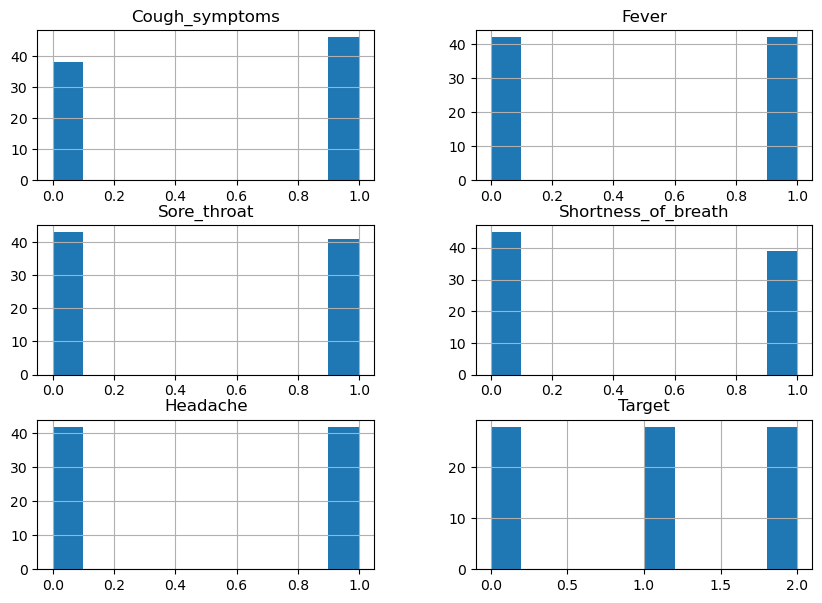

In [64]:
pre_c_df.hist(figsize=(10,7))

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

knn_c = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7]
}

g_knn_c = GridSearchCV(knn_c, param_grid=parameters, refit=True, cv=5, )

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):

    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='micro')
    recall = recall_score(y_test , prediction, average='micro')
    f1 = f1_score(y_test, prediction, average='micro')

    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        
        plt.show()